In [1]:
import random
import functools
import timeit
import typing
import matplotlib.pyplot as plt
import numpy as np

In [2]:
vec = [random.randint(1, 1000) for _ in range(0, 17 * (10 ** 5))]


def Ex1(vec: list):
    return sum(vec)


def Ex2(vec: list):
    max = vec[0]
    for item in vec[1:]:
        if item > max:
            max = item
    return max

def Ex3(vec: list):
    min = vec[0]
    for item in vec[1:]:
        if item < min:
            min = item
    return min
def Ex4(vec: list):
    n = 17 * (10**5)
    reciprocal_sum = sum(1 / x for x in vec[:n])
    harmonic_mean = len(vec[:n]) / reciprocal_sum
    return harmonic_mean
def matrix_multiplicathion():
    n = 17 * (100)
    matrix1 = np.random.randint(1, 17, size=(n, n))
    matrix2 = np.random.randint(1, 17, size=(n, n))
    return matrix1[:n].dot(matrix2[:n])

def get_usage_time(
        *, number: int = 1, setup: str = 'pass', ndigits: int = 3
) -> typing.Callable:
    def decorator(func: typing.Callable) -> typing.Callable:
        @functools.wraps(func)
        def wrapper(*args, **kwargs) -> float:
            usage_time = timeit.timeit(
                lambda: func(*args, **kwargs),
                setup=setup,
                number=number,
            )
            return round(usage_time / number, ndigits)

        return wrapper

    return decorator

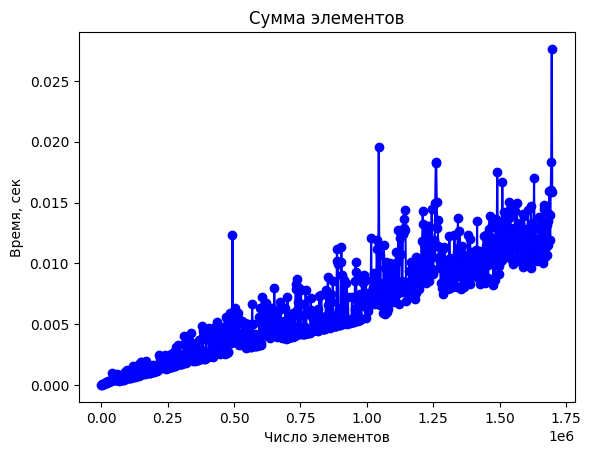

In [20]:
N = 17
func = get_usage_time(ndigits=5, number=5)(Ex1)
items = [i for i in range(1, len(vec), 1900)]
times = [func(vec[:i]) for i in items]

fig = plt.plot(items, times, 'bo-')
plt.title('Сумма элементов')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()

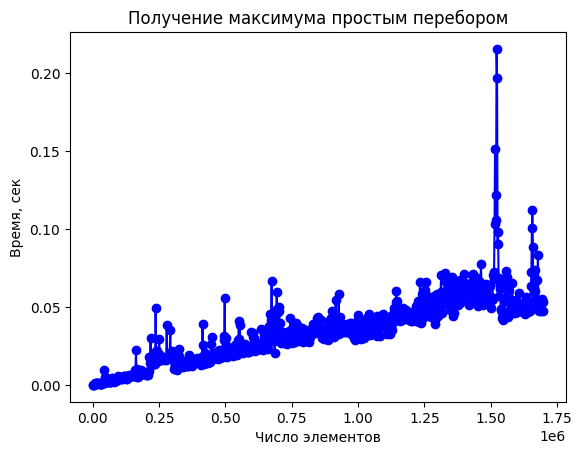

In [21]:
N = 17
func = get_usage_time(ndigits=5, number=5)(Ex2)
items = [i for i in range(1, len(vec), 1900)]
times = [func(vec[:i]) for i in items]

fig = plt.plot(items, times, 'bo-')
plt.title('Получение максимума простым перебором')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()

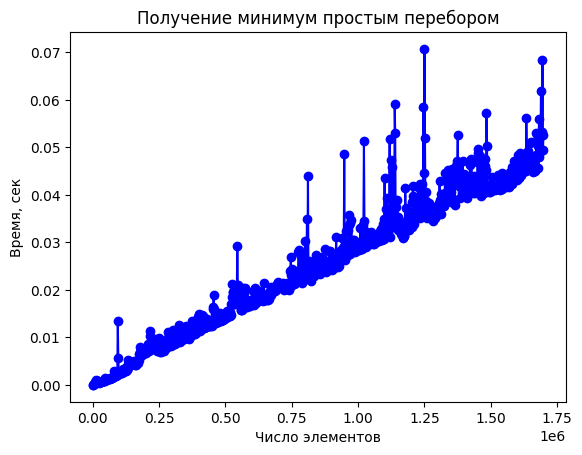

In [22]:
N = 17
func = get_usage_time(ndigits=5, number=5)(Ex3)
items = [i for i in range(1, len(vec), 1900)]
times = [func(vec[:i]) for i in items]

fig = plt.plot(items, times, 'bo-')
plt.title('Получение минимум простым перебором')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()

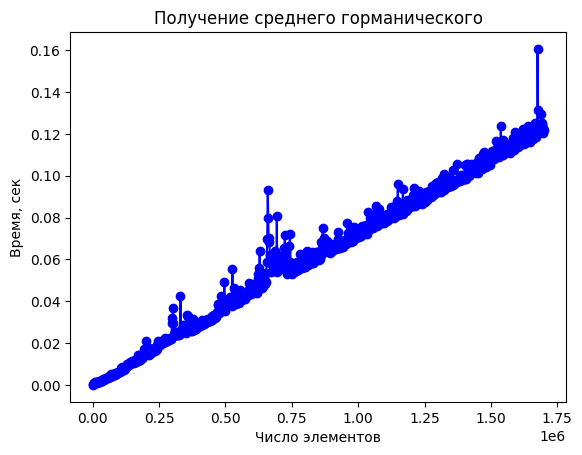

In [3]:
N = 17
func = get_usage_time(ndigits=5, number=5)(Ex4)
items = [i for i in range(1, len(vec), 1900)]
times = [func(vec[:i]) for i in items]

fig = plt.plot(items, times, 'bo-')
plt.title('Получение cреднего горманического')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()

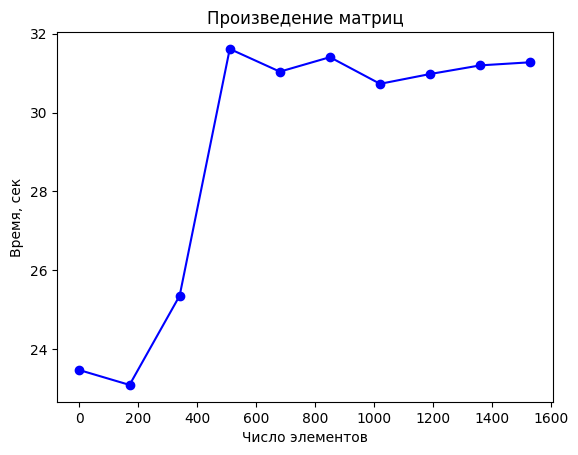

In [3]:
N = 17
count = range(1, 100 * N, 10 * N)
func = get_usage_time(ndigits=5)(matrix_multiplicathion)
items = [i for i in count]
times = [func() for i in items]

fig = plt.plot(items, times, 'bo-')
plt.title('Произведение матриц')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()